In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rc('font',family = 'SimHei',size = 13)
import datetime
import seaborn as sns

In [3]:
path = "Data_L1.csv"
data = pd.read_csv(path)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/2009 7:45,6.95,13085,United Kingdom,1/12/2009
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/2009 7:45,6.75,13085,United Kingdom,1/12/2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/2009 7:45,6.75,13085,United Kingdom,1/12/2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/2009 7:45,2.10,13085,United Kingdom,1/12/2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/2009 7:45,1.25,13085,United Kingdom,1/12/2009


In [4]:
data.Date = pd.to_datetime(data.Date,format = '%d/%m/%Y')
data.InvoiceDate = pd.to_datetime(data.InvoiceDate,format = '%d/%m/%Y %H:%M')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01


In [5]:
data['Cancel_Invoice'] = data.Invoice.str.startswith('C')
data0 = data[data.Date<'2011-12-01']
data0['First_Purchase'] = data0.groupby('Customer ID')['Date'].transform('min')
data0['Cohort_Month'] = data0.First_Purchase.dt.year * 100+ data0.First_Purchase.dt.month
data0['Cohort_Index'] = (data0.Date.dt.year - data0.First_Purchase.dt.year) * 12 + (data0.Date.dt.month - data0.First_Purchase.dt.month)
data0['Invoice_Year'] = data0.Date.dt.year
data0['Invoice_Month'] = data0.Date.dt.month
data0['GMV'] = data0['Price'] * data0['Quantity']
data0.head(20)

<ipython-input-5-806bc8f78aac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['First_Purchase'] = data0.groupby('Customer ID')['Date'].transform('min')
<ipython-input-5-806bc8f78aac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['Cohort_Month'] = data0.First_Purchase.dt.year * 100+ data0.First_Purchase.dt.month
<ipython-input-5-806bc8f78aac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cancel_Invoice,First_Purchase,Cohort_Month,Cohort_Index,Invoice_Year,Invoice_Month,GMV
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,45.00


In [6]:
data['Cancel_Invoice'] = data.Invoice.str.startswith('C')
data = data[(data.Cancel_Invoice ==False)&(data.Date<'2011-12-01')]
data['First_Purchase'] = data.groupby('Customer ID')['Date'].transform('min')
data['Cohort_Month'] = data.First_Purchase.dt.year * 100+ data.First_Purchase.dt.month
data['Cohort_Index'] = (data.Date.dt.year - data.First_Purchase.dt.year) * 12 + (data.Date.dt.month - data.First_Purchase.dt.month)
data['Invoice_Year'] = data.Date.dt.year
data['Invoice_Month'] = data.Date.dt.month
data['GMV'] = data['Price'] * data['Quantity']

data['Cohort_Lead'] = data.groupby(['Customer ID'])['Cohort_Index'].shift(1)
data['Month_Gap'] = data['Cohort_Index'] - data['Cohort_Lead']
data['Last_Gap'] = (2011-data.Invoice_Year)*12 + (12 - data.Invoice_Month)
data.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cancel_Invoice,First_Purchase,Cohort_Month,Cohort_Index,Invoice_Year,Invoice_Month,GMV,Cohort_Lead,Month_Gap,Last_Gap
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,83.40,NaN,NaN,24
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.00,0.0,0.0,24
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.00,0.0,0.0,24
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,100.80,0.0,0.0,24
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.00,0.0,0.0,24
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,39.60,0.0,0.0,24
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.00,0.0,0.0,24
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,59.50,0.0,0.0,24
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.60,0.0,0.0,24
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,45.00,0.0,0.0,24


In [9]:
data['GMV_Per_Invoice'] = data.groupby(['Customer ID','Invoice'])['GMV'].transform('sum')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cancel_Invoice,First_Purchase,Cohort_Month,Cohort_Index,Invoice_Year,Invoice_Month,GMV,Cohort_Lead,Month_Gap,Last_Gap,GMV_Per_Invoice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,83.4,NaN,NaN,24,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.0,0.0,0.0,24,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,81.0,0.0,0.0,24,505.3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,100.8,0.0,0.0,24,505.3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,2009-12-01,200912,0,2009,12,30.0,0.0,0.0,24,505.3


In [15]:
## 方法一：得到的是Series
First_GMV = data[data.Date==data.First_Purchase].sort_values('InvoiceDate').groupby(['Customer ID'])['GMV_Per_Invoice'].nth(0)

## 方法二：作为 new column 
data['First_GMV'] = data[data.Date==data.First_Purchase].sort_values('InvoiceDate').groupby(['Customer ID'])['GMV_Per_Invoice'].transform('first')



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cancel_Invoice,...,Cohort_Month,Cohort_Index,Invoice_Year,Invoice_Month,GMV,Cohort_Lead,Month_Gap,Last_Gap,GMV_Per_Invoice,First_GMV
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,False,...,200912,0,2009,12,83.4,NaN,NaN,24,505.3,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,...,200912,0,2009,12,81.0,0.0,0.0,24,505.3,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,...,200912,0,2009,12,81.0,0.0,0.0,24,505.3,505.3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,False,...,200912,0,2009,12,100.8,0.0,0.0,24,505.3,505.3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,...,200912,0,2009,12,30.0,0.0,0.0,24,505.3,505.3


In [18]:
First_GMV

Customer ID
12346      45.00
12347     611.53
12348     222.16
12349    1068.52
12350     334.40
          ...   
18283     101.35
18284     461.68
18285     427.00
18286     462.95
18287    1071.61
Name: GMV_Per_Invoice, Length: 5853, dtype: float64

In [21]:
data['1st_Invoice'] = data[data.Date==data.First_Purchase].sort_values('InvoiceDate').groupby(['Customer ID'])['Invoice'].transform('first')
First_Invoice = data[data.Date==data.First_Purchase].sort_values('InvoiceDate').groupby(['Customer ID'])['Invoice'].nth(0)

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cancel_Invoice,...,Cohort_Index,Invoice_Year,Invoice_Month,GMV,Cohort_Lead,Month_Gap,Last_Gap,GMV_Per_Invoice,First_GMV,1st_Invoice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,False,...,0,2009,12,83.4,NaN,NaN,24,505.3,505.3,489434
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,...,0,2009,12,81.0,0.0,0.0,24,505.3,505.3,489434
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,False,...,0,2009,12,81.0,0.0,0.0,24,505.3,505.3,489434
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01,False,...,0,2009,12,100.8,0.0,0.0,24,505.3,505.3,489434
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01,False,...,0,2009,12,30.0,0.0,0.0,24,505.3,505.3,489434


In [22]:
First_Invoice[13085]

'489434'

In [ ]:
data = data.join(First_Invoice,on='Customer ID',rsuffix='_Number')
data.head()

In [230]:
FirstProductWide =data[data['Invoice']==data['Invoice_Number']].groupby('Customer ID').agg({'StockCode':'nunique'})
FirstProductWide 

,StockCode
Customer ID,
12346,1
12347,40
12348,20
12349,46
12350,17
...,...
18283,40
18284,28
18285,12


In [231]:
## 拿一个例子出来看看， 会出现 情况是：有顾客会在第一天，下多单的情况：
C12346 = data[(data['Customer ID']==12346)].sort_values(['InvoiceDate'])
C12346[['First_Purchase','Date','Invoice']]

,First_Purchase,Date,Invoice
21779,2009-12-14,2009-12-14,491725
22035,2009-12-14,2009-12-14,491742
22038,2009-12-14,2009-12-14,491744
28943,2009-12-14,2009-12-18,492718
28955,2009-12-14,2009-12-18,492722
31760,2009-12-14,2010-01-04,493410
31762,2009-12-14,2010-01-04,493412
38451,2009-12-14,2010-01-14,494450
45590,2009-12-14,2010-01-22,495295
79532,2009-12-14,2010-03-02,499763


In [232]:
First_Month_Frequency = data[(data.Invoice_Year*100+data.Invoice_Month)==data.Cohort_Month].groupby('Customer ID').agg({'Invoice':'nunique'})
First_Month_Frequency

,Invoice
Customer ID,
12346,5
12347,1
12348,1
12349,1
12350,1
...,...
18283,1
18284,1
18285,1


In [233]:
data_2 = data.groupby(['Customer ID','Cohort_Month']).agg({'Invoice':'nunique',
                                                              'GMV':'sum',
                                                              'Month_Gap':'mean',
                                                              'Cohort_Index':'max',
                                                              'Last_Gap':'min',
                                                              'StockCode':'nunique',
                                                               'Price':'mean'
                                                             }).reset_index()
data_2 = data_2.join(First_GMV, on ='Customer ID').join(FirstProductWide,on = 'Customer ID',rsuffix='_wide').join(First_Month_Frequency,on = 'Customer ID',rsuffix='_1stMonth')

In [234]:
data_2['Churn'] = data_2.Last_Gap.apply(lambda x: 1 if x>5 else 0)
data_2['Type'] = data_2.Cohort_Month.apply(lambda x: 'Fresh Customer' if x>201106 else 'Old Customer')

data_2 = data_2.rename({"Invoice":'Nos_of_purchase','StockCode':'Product_Wide',
                        "GMV_Per_Invoice":'1st_GMV','Invoice_Number':'1st_Invoice',
                        'StockCode_wide':'1st_Product_Wide','Invoice_1stMonth':'1st_Month_Frequency',
                        'Price':'Price_Mean'},axis=1)
data_2.head()

,Customer ID,Cohort_Month,Nos_of_purchase,GMV,Month_Gap,Cohort_Index,Last_Gap,Product_Wide,Price_Mean,1st_GMV,1st_Product_Wide,1st_Month_Frequency,Churn,Type
0,12346,200912,12,77556.46,0.393939,13,11,27,6.100000,45.00,1,5,1,Old Customer
1,12347,201010,7,5408.50,0.049793,12,2,123,2.605868,611.53,40,1,0,Old Customer
2,12348,201009,5,2019.40,0.240000,12,3,25,3.786275,222.16,20,1,0,Old Customer
3,12349,201004,4,4428.69,0.109195,19,1,138,8.459657,1068.52,46,1,0,Old Customer
4,12350,201102,1,334.40,0.000000,0,10,17,3.841176,334.40,17,1,1,Old Customer


In [235]:
data_2['Churn'].value_counts()

0    3281
1    2572
Name: Churn, dtype: int64

In [236]:
data_2['1st_Product_Wide'].describe()

count    5853.000000
mean       24.056040
std        22.892463
min         1.000000
25%         9.000000
50%        18.000000
75%        31.000000
max       259.000000
Name: 1st_Product_Wide, dtype: float64

In [237]:
def ProductWideClassifiers(x):
    if x==1:
        y = '1'
    elif x==2:
        y = '2'
    elif x==3:
        y = '3'
    elif x==4:
        y = '4'
    elif 5<=x<10:
        y = '5-9'
    elif 10<=x<15:
        y = '10-14'
    elif 15<=x<20:
        y = '15-19'
    elif 20<=x<25:
        y = '20-24'
    elif 25<=x<30:
        y = '25-29'
    elif 30<=x <35:
        y = '30-34'
    elif 35<=x <40:
        y = '35-39'
    elif 40<=x <45:
        y = '40-44'
    else:
        y = '>=45'
    return y

data_2['Tag_PW']=data_2['1st_Product_Wide'].apply(ProductWideClassifiers)
data_2['1st_Month_Frequency'] = data_2['1st_Month_Frequency'].apply(lambda x: 5 if x>4 else x)


In [238]:
def Classifiers(x):
    for i in range(0,24,3):
        if x==0:
            x = 0 
            return x
        if i< x<=i+3:
            x = i+3
            return x
            break
        else:
            continue

data_2['Cohort_Index2'] = data_2['Cohort_Index'].apply(Classifiers)

In [239]:
def GmvClassifiers(x):
    if x<50:
        z = '<50'
        return z 
    elif x>=1000:
        z = '>=1000'
        return z 
    for y in range(50,1000,50):
        if y<=x<y+50:
            z = str(y)+'-'+str(y+50)
            return z 
            break
        else:
            continue

data_2['Tag_GMV']=data_2['1st_GMV'].apply(GmvClassifiers)
data_2

,Customer ID,Cohort_Month,Nos_of_purchase,GMV,Month_Gap,Cohort_Index,Last_Gap,Product_Wide,Price_Mean,1st_GMV,1st_Product_Wide,1st_Month_Frequency,Churn,Type,Tag_PW,Cohort_Index2,Tag_GMV
0,12346,200912,12,77556.46,0.393939,13,11,27,6.100000,45.00,1,5,1,Old Customer,1,15,<50
1,12347,201010,7,5408.50,0.049793,12,2,123,2.605868,611.53,40,1,0,Old Customer,40-44,12,600-650
2,12348,201009,5,2019.40,0.240000,12,3,25,3.786275,222.16,20,1,0,Old Customer,20-24,12,200-250
3,12349,201004,4,4428.69,0.109195,19,1,138,8.459657,1068.52,46,1,0,Old Customer,>=45,21,>=1000
4,12350,201102,1,334.40,0.000000,0,10,17,3.841176,334.40,17,1,1,Old Customer,15-19,0,300-350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,18283,201002,21,2528.65,0.022460,21,1,348,1.767489,101.35,40,1,0,Old Customer,40-44,21,100-150
5849,18284,201010,1,461.68,0.000000,0,14,28,3.253214,461.68,28,1,1,Old Customer,25-29,0,450-500
5850,18285,201002,1,427.00,0.000000,0,22,12,8.350000,427.00,12,1,1,Old Customer,10-14,0,400-450
5851,18286,200912,2,1296.43,0.121212,8,16,67,4.273134,462.95,17,1,1,Old Customer,15-19,9,450-500


In [240]:
def PriceClassifiers(x):
    if x<1:
        y = '<1'
    elif 1<= x <2:
        y = '[1-2)'
    elif 2<= x <3:
        y = '[2-3)'
    elif 3<= x <4:
        y = '[3-4)'
    elif 4<= x <5:
        y = '[4-5)'
    elif 5<= x <11:
        y = '[5-11)'
    else:
        y ='>=11'
    return y

data_2['Tag_Price']=data_2['Price_Mean'].apply(PriceClassifiers)
data_2

,Customer ID,Cohort_Month,Nos_of_purchase,GMV,Month_Gap,Cohort_Index,Last_Gap,Product_Wide,Price_Mean,1st_GMV,1st_Product_Wide,1st_Month_Frequency,Churn,Type,Tag_PW,Cohort_Index2,Tag_GMV,Tag_Price
0,12346,200912,12,77556.46,0.393939,13,11,27,6.100000,45.00,1,5,1,Old Customer,1,15,<50,[5-11)
1,12347,201010,7,5408.50,0.049793,12,2,123,2.605868,611.53,40,1,0,Old Customer,40-44,12,600-650,[2-3)
2,12348,201009,5,2019.40,0.240000,12,3,25,3.786275,222.16,20,1,0,Old Customer,20-24,12,200-250,[3-4)
3,12349,201004,4,4428.69,0.109195,19,1,138,8.459657,1068.52,46,1,0,Old Customer,>=45,21,>=1000,[5-11)
4,12350,201102,1,334.40,0.000000,0,10,17,3.841176,334.40,17,1,1,Old Customer,15-19,0,300-350,[3-4)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,18283,201002,21,2528.65,0.022460,21,1,348,1.767489,101.35,40,1,0,Old Customer,40-44,21,100-150,[1-2)
5849,18284,201010,1,461.68,0.000000,0,14,28,3.253214,461.68,28,1,1,Old Customer,25-29,0,450-500,[3-4)
5850,18285,201002,1,427.00,0.000000,0,22,12,8.350000,427.00,12,1,1,Old Customer,10-14,0,400-450,[5-11)
5851,18286,200912,2,1296.43,0.121212,8,16,67,4.273134,462.95,17,1,1,Old Customer,15-19,9,450-500,[4-5)


In [241]:
data_2[data_2['Tag_Price']=='>500']

,Customer ID,Cohort_Month,Nos_of_purchase,GMV,Month_Gap,Cohort_Index,Last_Gap,Product_Wide,Price_Mean,1st_GMV,1st_Product_Wide,1st_Month_Frequency,Churn,Type,Tag_PW,Cohort_Index2,Tag_GMV,Tag_Price


In [242]:
data_2['Nos_of_purchase'] = data_2.Nos_of_purchase.apply(lambda x: 11 if x>10 else x)
data_2['Nos_of_purchase'].value_counts()

1     1653
2      942
11     851
3      649
4      491
5      357
6      274
7      212
8      178
9      142
10     104
Name: Nos_of_purchase, dtype: int64

In [243]:
data_2[data_2['Churn']==1]['Nos_of_purchase'].value_counts()

1     1190
2      543
3      285
4      192
5      116
6       79
11      63
7       45
8       34
9       13
10      12
Name: Nos_of_purchase, dtype: int64

In [253]:
data_2['Month_Gap'].describe()

count    5739.000000
mean        0.163553
std         0.509163
min         0.000000
25%         0.000000
50%         0.059603
75%         0.156250
max        17.000000
Name: Month_Gap, dtype: float64

# 按照 Nos_of_purchase 分析

In [250]:
data_3 = data_2.groupby(['Nos_of_purchase']).agg({'Customer ID':'nunique','Churn':'sum'})
data_3['Old_Customer']= data_2[data_2['Type']=='Old Customer'].groupby(['Nos_of_purchase']).agg({'Customer ID':'nunique'})
data_3['Churn Rate1']=data_3['Churn']/data_3['Customer ID']
data_3['Churn Rate2']=data_3['Churn']/data_3['Old_Customer']
data_3['Churn/ChurnTotal'] = data_3['Churn']/2572
data_3.to_excel('ChurnbynosofPurchase.xlsx')

<AxesSubplot:xlabel='Nos_of_purchase'>

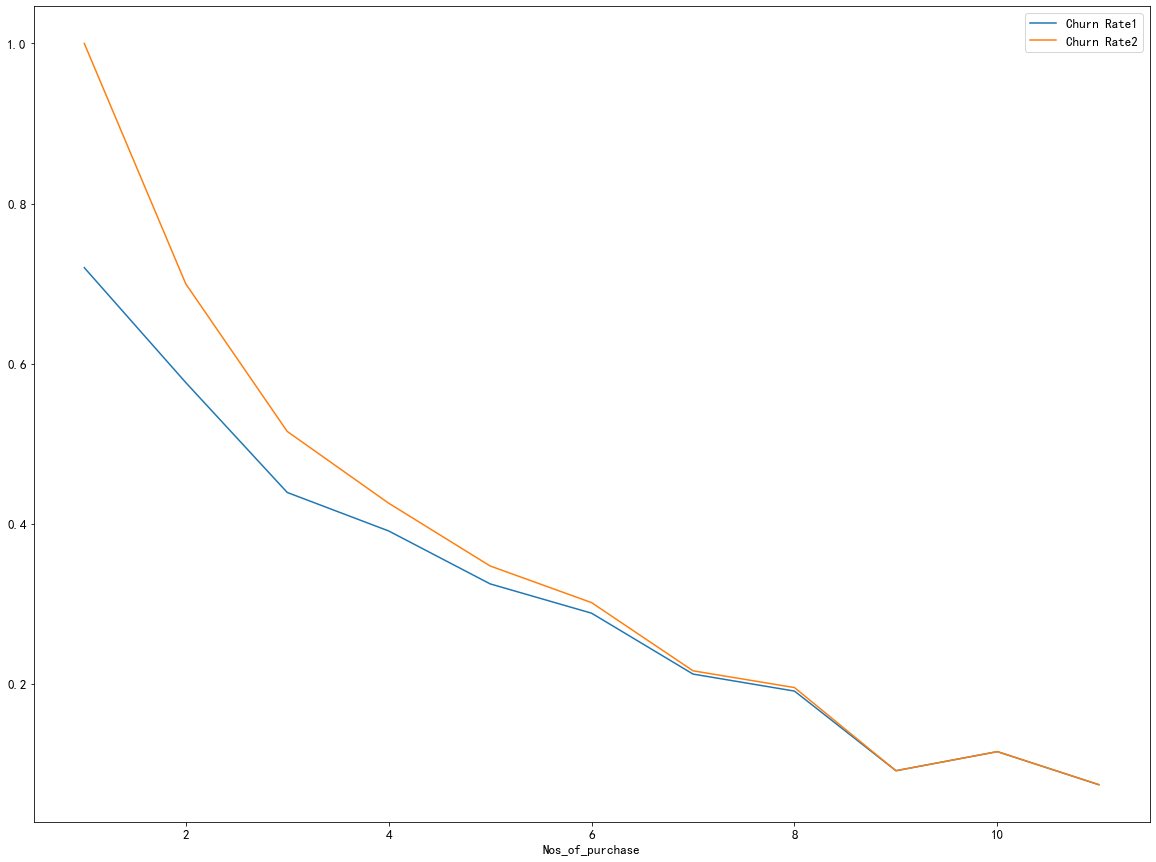

In [21]:
data_3.plot.line(figsize = (20,15),y=['Churn Rate1','Churn Rate2'])

# 基于1st_Product_Wide 分析

In [244]:
cohort_raw = data_2.groupby(['Tag_PW','Cohort_Index2'])['Customer ID'].nunique().reset_index()
cohort_raw = cohort_raw.rename(columns = {'Customer ID':'Nos_of_customer'})
cohort_raw.head(20)

,Tag_PW,Cohort_Index2,Nos_of_customer
0,1,0,131
1,1,3,8
2,1,6,13
3,1,9,16
4,1,12,13
5,1,15,12
6,1,18,12
7,1,21,16
8,1,24,29
9,10-14,0,262


In [22]:
data_4 = data_2.groupby(['Tag_PW']).agg({'Customer ID':'nunique','Churn':'sum','1st_Product_Wide':'mean'}).reset_index()
data_4['Churn Rate']=data_4['Churn']/data_4['Customer ID']
data_4['Churn/ChurnTotal'] = data_4['Churn']/2572
data_4 = data_4.sort_values('1st_Product_Wide')
data_4 = data_4.set_index('Tag_PW')
data_4

,Customer ID,Churn,1st_Product_Wide,Churn Rate,Churn/ChurnTotal
Tag_PW,,,,,
1,250,158,1.000000,0.632000,0.061431
2,138,68,2.000000,0.492754,0.026439
3,139,71,3.000000,0.510791,0.027605
4,152,77,4.000000,0.506579,0.029938
5-9,824,395,7.066748,0.479369,0.153577
10-14,818,377,12.008557,0.460880,0.146579
15-19,827,376,17.060459,0.454655,0.146190
20-24,695,300,21.812950,0.431655,0.116641
25-29,454,187,26.947137,0.411894,0.072706


<AxesSubplot:xlabel='Tag_PW'>

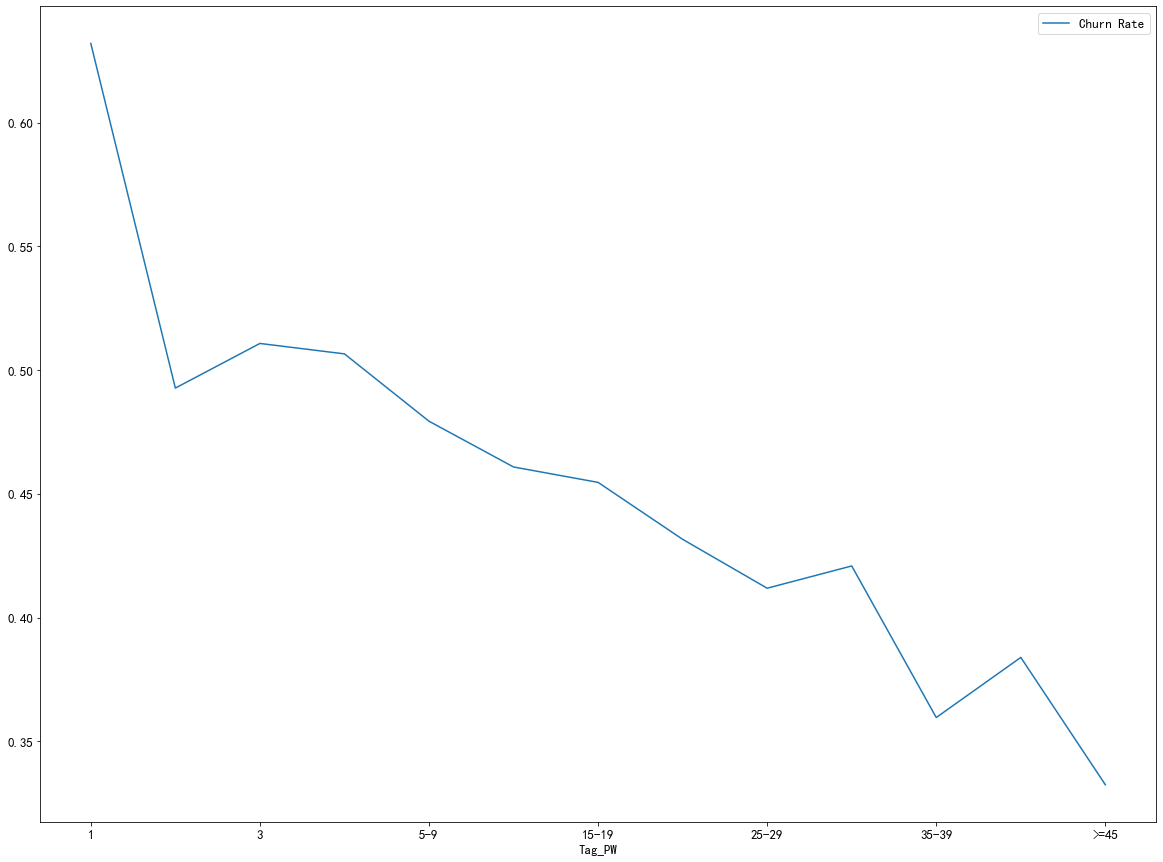

In [23]:
data_4.plot.line(figsize = (20,15),y='Churn Rate')

## 基于1st_GMV 分析

In [114]:
data_5 = data_2.groupby(['Tag_GMV']).agg({'Customer ID':'nunique','Churn':'sum','1st_GMV':'mean'}).reset_index()
data_5['Churn Rate']=data_5['Churn']/data_5['Customer ID']
data_5['Churn/ChurnTotal'] = data_5['Churn']/2572
data_5 = data_5.sort_values('1st_GMV')
#data_5 = data_5.set_index('Tag_PW')
data_5

,Tag_GMV,Customer ID,Churn,1st_GMV,Churn Rate,Churn/ChurnTotal
19,<50,158,97,26.729684,0.613924,0.037714
8,50-100,310,179,76.944548,0.577419,0.069596
0,100-150,710,375,123.837211,0.528169,0.145801
1,150-200,669,345,173.504066,0.515695,0.134137
2,200-250,616,266,223.435651,0.431818,0.103421
3,250-300,495,209,275.943859,0.422222,0.081260
4,300-350,717,317,320.223432,0.442120,0.123250
5,350-400,398,163,373.441058,0.409548,0.063375
6,400-450,291,118,423.779519,0.405498,0.045879
7,450-500,222,85,474.662162,0.382883,0.033048


<AxesSubplot:xlabel='Tag_GMV'>

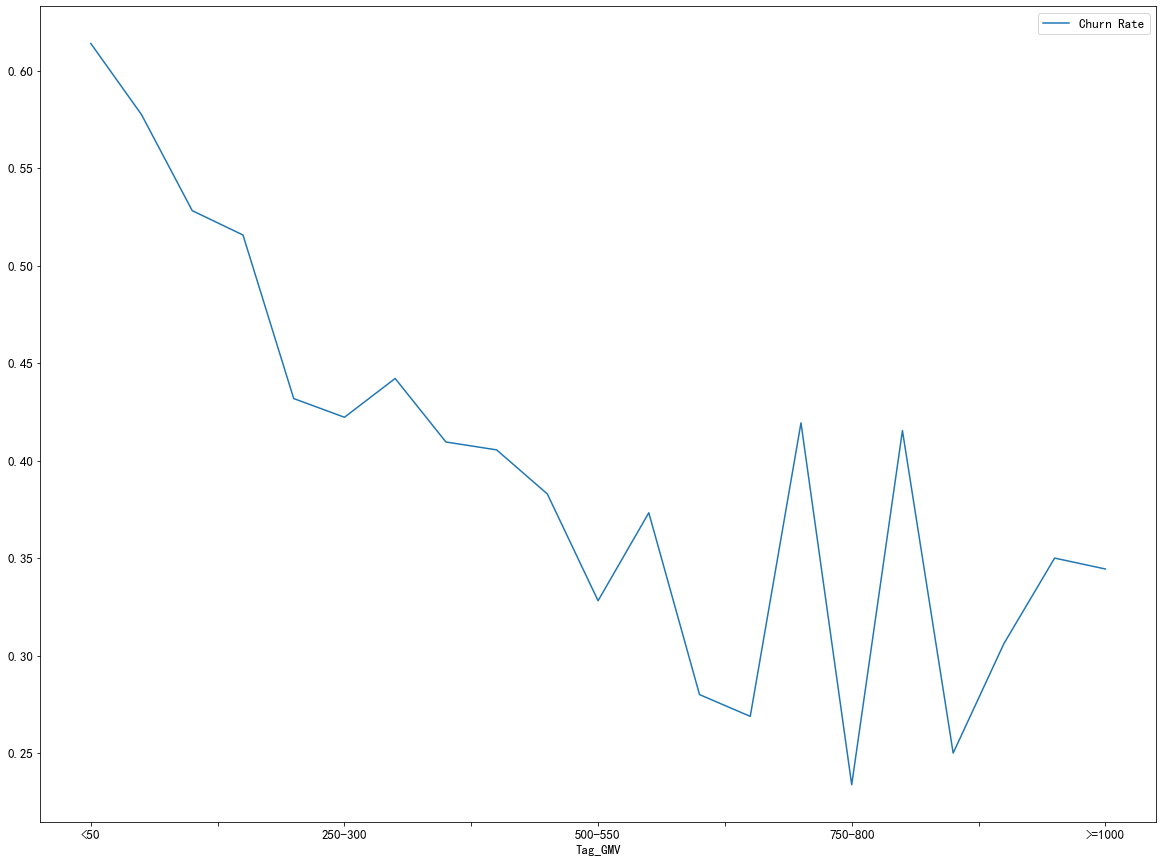

In [115]:
data_5.plot.line(figsize = (20,15),x='Tag_GMV', y='Churn Rate')

# 基于1st_Month_Frequency 分析

In [193]:
data_6 = data_2.groupby(['1st_Month_Frequency']).agg({'Customer ID':'nunique','Churn':'sum'}).reset_index()
data_6['Churn Rate']=data_6['Churn']/data_6['Customer ID']
data_6['Churn/ChurnTotal'] = data_6['Churn']/2572
#data_5 = data_5.sort_values('1st_GMV')
#data_5 = data_5.set_index('Tag_PW')
data_6

,1st_Month_Frequency,Customer ID,Churn,Churn Rate,Churn/ChurnTotal
0,1,4943,2272,0.459640,0.883359
1,2,672,237,0.352679,0.092146
2,3,148,42,0.283784,0.016330
3,4,47,13,0.276596,0.005054
4,5,43,8,0.186047,0.003110


In [248]:
cohort_raw1 = data_2.groupby(['1st_Month_Frequency','Cohort_Index2'])['Customer ID'].nunique().reset_index()
cohort_raw1 = cohort_raw1.rename(columns = {'Customer ID':'Nos_of_customer'})
#cohort_raw0= cohort_raw0.sort_values(['Cohort_month','Cohort_index2'],ascending = False )
cohort_raw1

,1st_Month_Frequency,Cohort_Index2,Nos_of_customer
0,1,0,1653
1,1,3,494
2,1,6,383
3,1,9,344
4,1,12,424
5,1,15,409
6,1,18,381
7,1,21,462
8,1,24,393
9,2,0,128


In [249]:
cohort_result1 = cohort_raw1.pivot(index = '1st_Month_Frequency', columns = 'Cohort_Index2', values = 'Nos_of_customer')
cohort_result1

Cohort_Index2,0,3,6,9,12,15,18,21,24
1st_Month_Frequency,,,,,,,,,
1,1653,494,383,344,424,409,381,462,393
2,128,80,43,48,66,58,45,80,124
3,27,11,9,10,14,13,8,18,38
4,6,3,3,5,2,4,6,4,14
5,3,3,2,2,2,2,2,3,24


# 基于Price_mean 分析

In [102]:

data_7 = data_2.groupby(['Tag_Price']).agg({'Customer ID':'nunique','Churn':'sum'}).reset_index()
data_7['Churn Rate']=data_7['Churn']/data_7['Customer ID']
data_7['Churn/ChurnTotal'] = data_7['Churn']/2572

data_7 = data_7.set_index('Tag_Price')
data_7.sort_values('Churn Rate')

,Customer ID,Churn,Churn Rate,Churn/ChurnTotal
Tag_Price,,,,
[2-3),2052,803,0.391326,0.312208
[3-4),1556,635,0.408098,0.246890
[1-2),827,357,0.431681,0.138802
[4-5),644,321,0.498447,0.124806
<1,113,63,0.557522,0.024495
[5-11),555,324,0.583784,0.125972
>=11,106,69,0.650943,0.026827


<AxesSubplot:xlabel='Tag_Price'>

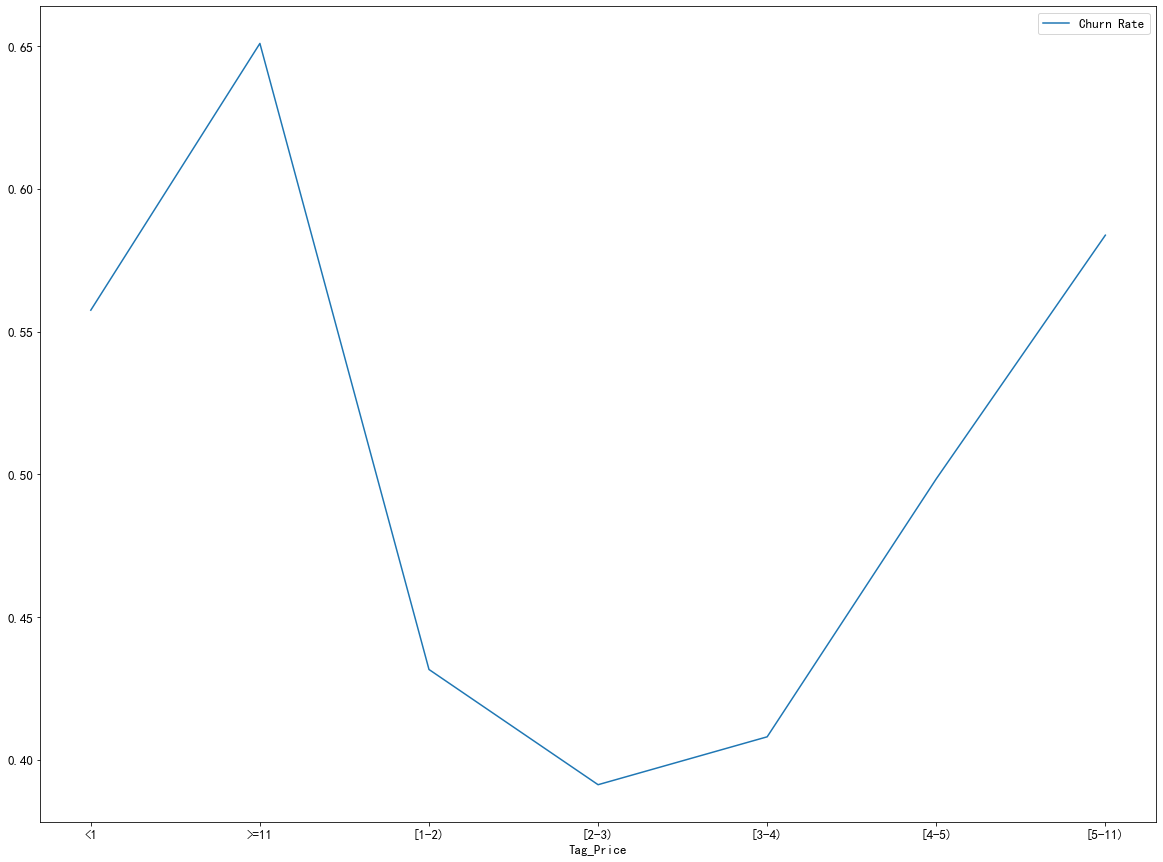

In [103]:
data_7.plot.line(figsize = (20,15), y='Churn Rate')

## 将所有流失的顾客 拿出来做一个分析

In [127]:
data_2[data_2['Churn']==1][['1st_GMV','1st_Product_Wide','Nos_of_purchase','1st_Month_Frequency','Price_Mean']].describe()

,1st_GMV,1st_Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean
count,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000
mean,365.041875,21.160575,2.515552,1.163297,14.406525
std,635.699582,20.639906,2.224678,0.681881,263.270414
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,148.072500,8.000000,1.000000,1.000000,2.299846
50%,254.145000,16.000000,2.000000,1.000000,3.082346
75%,390.667500,27.000000,3.000000,1.000000,4.153585
max,15160.900000,220.000000,11.000000,22.000000,10953.500000


In [175]:
Big_value = data_2[(data_2['Churn']==1)&(data_2['Price_Mean']>100)]
list = Big_value['Customer ID'] 
list

153     12503
205     12555
284     12636
382     12737
562     12918
929     13290
1083    13452
1401    13776
1686    14063
1877    14255
1930    14308
1949    14328
2419    14802
2448    14832
2710    15098
2813    15202
3118    15510
3366    15760
3647    16047
3888    16291
5798    18233
Name: Customer ID, dtype: int64

In [176]:
data_2[(data_2['Churn']==1)&(~data_2['Customer ID'].isin(list))][['1st_GMV','1st_Product_Wide','Nos_of_purchase','1st_Month_Frequency','Price_Mean']].describe()

,1st_GMV,1st_Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,356.756277,21.323403,2.520580,1.159937,3.860145
std,586.019586,20.645753,2.227517,0.679315,5.226282
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,148.255000,8.000000,1.000000,1.000000,2.294741
50%,254.000000,16.000000,2.000000,1.000000,3.070565
75%,389.560000,27.000000,3.000000,1.000000,4.122778
max,15160.900000,220.000000,11.000000,22.000000,100.000000


In [121]:
data_2[(data_2['Churn']==0)&(data_2['Type']=='Old Customer')][['1st_GMV','1st_Product_Wide','Nos_of_purchase','1st_Month_Frequency','Price_Mean']].describe()

,1st_GMV,1st_Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,472.728865,26.173209,7.074868,1.328612,3.330520
std,885.936373,23.801574,3.339443,0.917479,2.875499
min,1.550000,1.000000,2.000000,1.000000,0.261538
25%,201.665000,11.000000,4.000000,1.000000,2.376296
50%,314.370000,20.000000,7.000000,1.000000,2.926875
75%,529.040000,35.000000,11.000000,1.000000,3.665607
max,33167.800000,250.000000,11.000000,14.000000,62.155263


In [116]:
temp = data_2[data_2['Churn']==1].groupby('Tag_GMV').agg({'Customer ID':'nunique'})
temp['%'] = temp['Customer ID']/2572
temp

,Customer ID,%
Tag_GMV,,
100-150,375,0.145801
150-200,345,0.134137
200-250,266,0.103421
250-300,209,0.081260
300-350,317,0.123250
350-400,163,0.063375
400-450,118,0.045879
450-500,85,0.033048
50-100,179,0.069596


In [118]:
temp2 = data_2[data_2['Churn']==0 & (data_2['Type']=='Old Customer')].groupby('Tag_GMV').agg({'Customer ID':'nunique'})
temp2['%'] = temp2['Customer ID']/2471
temp2

,Customer ID,%
Tag_GMV,,
100-150,335,0.135573
150-200,324,0.131121
200-250,350,0.141643
250-300,286,0.115743
300-350,400,0.161878
350-400,235,0.095103
400-450,173,0.070012
450-500,137,0.055443
50-100,131,0.053015


In [31]:
data_2[(data_2['Churn']==0)& (data_2['Type']=='Old Customer')][['1st_GMV','1st_Product_Wide','Nos_of_purchase','1st_Month_Frequency','Price_Mean']].describe()

,1st_GMV,1st_Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,472.728865,26.173209,7.074868,1.328612,3.330520
std,885.936373,23.801574,3.339443,0.917479,2.875499
min,1.550000,1.000000,2.000000,1.000000,0.261538
25%,201.665000,11.000000,4.000000,1.000000,2.376296
50%,314.370000,20.000000,7.000000,1.000000,2.926875
75%,529.040000,35.000000,11.000000,1.000000,3.665607
max,33167.800000,250.000000,11.000000,14.000000,62.155263


In [32]:
2572+2471-5853

-810

In [177]:
data_2[data_2['Churn']==1].groupby('Tag_Price').agg({'Customer ID':'nunique'})

,Customer ID
Tag_Price,
<1,63
>=11,69
[1-2),357
[2-3),803
[3-4),635
[4-5),321
[5-11),324


In [105]:
data_2[data_2['Churn']==0].groupby('Tag_Price').agg({'Customer ID':'nunique'})

,Customer ID
Tag_Price,
<1,50
>=11,37
[1-2),470
[2-3),1249
[3-4),921
[4-5),323
[5-11),231


# Create Feature List:

In [194]:
Feature_list = data_2.loc[:,('Customer ID','1st_GMV','GMV','1st_Product_Wide','Product_Wide','Nos_of_purchase','1st_Month_Frequency','Price_Mean','Churn','Type','Tag_Price','Tag_GMV','Tag_PW')]
Feature_list

,Customer ID,1st_GMV,GMV,1st_Product_Wide,Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean,Churn,Type,Tag_Price,Tag_GMV,Tag_PW
0,12346,45.00,77556.46,1,27,11,5,6.100000,1,Old Customer,[5-11),<50,1
1,12347,611.53,5408.50,40,123,7,1,2.605868,0,Old Customer,[2-3),600-650,40-44
2,12348,222.16,2019.40,20,25,5,1,3.786275,0,Old Customer,[3-4),200-250,20-24
3,12349,1068.52,4428.69,46,138,4,1,8.459657,0,Old Customer,[5-11),>=1000,>=45
4,12350,334.40,334.40,17,17,1,1,3.841176,1,Old Customer,[3-4),300-350,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,18283,101.35,2528.65,40,348,11,1,1.767489,0,Old Customer,[1-2),100-150,40-44
5849,18284,461.68,461.68,28,28,1,1,3.253214,1,Old Customer,[3-4),450-500,25-29
5850,18285,427.00,427.00,12,12,1,1,8.350000,1,Old Customer,[5-11),400-450,10-14
5851,18286,462.95,1296.43,17,67,2,1,4.273134,1,Old Customer,[4-5),450-500,15-19


In [183]:
Feature_list['Nos_of_purchase'].value_counts()

1     1653
2      942
11     851
3      649
4      491
5      357
6      274
7      212
8      178
9      142
10     104
Name: Nos_of_purchase, dtype: int64

In [184]:
Feature_list.corr()

,Customer ID,1st_GMV,GMV,1st_Product_Wide,Product_Wide,Nos_of_purchase,1st_Month_Frequency,Price_Mean,Churn
Customer ID,1.000000,-0.069661,-0.011496,-0.027600,0.001703,0.000275,0.036580,-0.017101,0.023500
1st_GMV,-0.069661,1.000000,0.319989,0.276723,0.131635,0.096190,0.095343,0.221047,-0.060333
GMV,-0.011496,0.319989,1.000000,0.030156,0.413810,0.267614,0.392600,0.012813,-0.118639
1st_Product_Wide,-0.027600,0.276723,0.030156,1.000000,0.437964,0.098228,0.035141,-0.030877,-0.111994
Product_Wide,0.001703,0.131635,0.413810,0.437964,1.000000,0.591557,0.352038,-0.021389,-0.305177
Nos_of_purchase,0.000275,0.096190,0.267614,0.098228,0.591557,1.000000,0.292669,-0.022824,-0.457622
1st_Month_Frequency,0.036580,0.095343,0.392600,0.035141,0.352038,0.292669,1.000000,0.012453,-0.082325
Price_Mean,-0.017101,0.221047,0.012813,-0.030877,-0.021389,-0.022824,0.012453,1.000000,0.029064
Churn,0.023500,-0.060333,-0.118639,-0.111994,-0.305177,-0.457622,-0.082325,0.029064,1.000000


In [195]:
Feature_list.to_csv('Feature_list0.csv')

In [254]:
data_2.to_csv('data_2.csv')